# BoomBikes Linear Regression Assignment 

Business Goal:

You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 

## Step 1: Reading and Understanding the Data

Let's start with the following steps:

1) Importing data using the pandas library

2) Understanding the structure of the data

In [1]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

# Import the numpy and pandas package
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Read the given CSV file, and view some sample records
bike = pd.read_csv('day.csv')

In [3]:
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
bike.shape

(730, 16)

In [5]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


## Step 2: Exploratory Data Analysis - EDA

The describe method will help to see how data has been spread for the numerical values. We can clearly see the minimum value, mean values, different percentile values and maximum values.

In [6]:
bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


### Formating and converting data

In [7]:
def ass_seas(x):
    if x==1:
        return 'spring'
    elif x==2:
        return 'summer'
    elif x==3:
        return 'fall'
    else:
        return 'winter'

bike['season'] = bike['season'].apply(ass_seas) 

In [8]:
bike['season'].value_counts()

fall      188
summer    184
spring    180
winter    178
Name: season, dtype: int64

In [9]:
def ass_yr(x):
    if x==1:
        return '2019'
    else:
        return '2018'
bike['yr'] = bike['yr'].apply(ass_yr)    

In [10]:
bike['yr'].value_counts()

2018    365
2019    365
Name: yr, dtype: int64

In [11]:
bike.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [12]:
def ass_mnth(x):
    return x.map({1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun', 7:'Jul', 8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'})

bike[['mnth']] = bike[['mnth']].apply(ass_mnth)

In [13]:
bike['mnth'].value_counts()

Aug    62
Oct    62
Jan    62
Jul    62
May    62
Mar    62
Dec    62
Apr    60
Nov    60
Sep    60
Jun    60
Feb    56
Name: mnth, dtype: int64

In [14]:
def ass_holi(x):
    if x==0:
        return 'No holiday'
    else:
        return 'Holiday'

bike['holiday'] = bike['holiday'].apply(ass_holi)    

In [15]:
bike['holiday'].value_counts()

No holiday    709
Holiday        21
Name: holiday, dtype: int64

In [16]:
def ass_wkday(x):
    return x.map({1:'Mon', 2:'Tue', 3:'Wed', 4:'Thu', 5:'Fri', 6:'Sat', 0:'Sun'})

bike[['weekday']] = bike[['weekday']].apply(ass_wkday)

In [17]:
bike['weekday'].value_counts()

Tue    105
Mon    105
Fri    104
Wed    104
Thu    104
Sun    104
Sat    104
Name: weekday, dtype: int64

In [18]:
def ass_wokday(x):
    if x==1:
        return 'Working day'
    else:
        return 'Non-Working day'

bike['workingday'] = bike['workingday'].apply(ass_wokday)  

In [19]:
bike['workingday'].value_counts()

Working day        504
Non-Working day    226
Name: workingday, dtype: int64

In [20]:
def ass_wth(x):
    if x==1:
        return 'Clear'
    elif x==2:
        return 'Mist'
    elif x==3:
        return 'Light Snow'
    else:
        return 'Heavy Rain'

bike['weathersit'] = bike['weathersit'].apply(ass_wth)  

In [21]:
bike['weathersit'].value_counts()

Clear         463
Mist          246
Light Snow     21
Name: weathersit, dtype: int64

### Visualising the Data

Analysis of a single variable

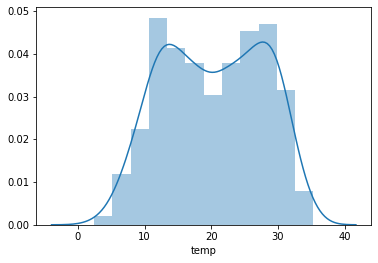

In [22]:
# distribution of temperature variables
sns.distplot(bike['temp'])
plt.show()

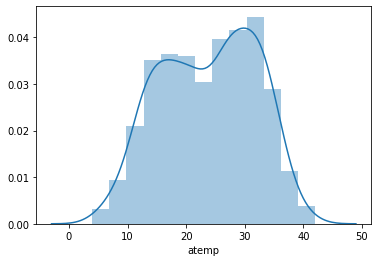

In [23]:
# distribution of a temperature variables
sns.distplot(bike['atemp'])
plt.show()

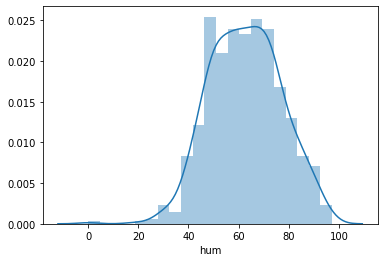

In [24]:
# distribution of humidity variables
sns.distplot(bike['hum'])
plt.show()

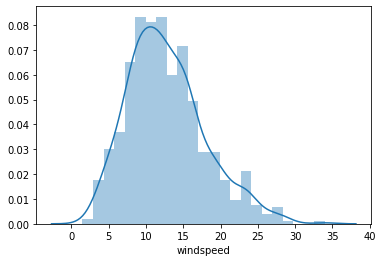

In [25]:
# distribution of windspeed variables
sns.distplot(bike['windspeed'])
plt.show()

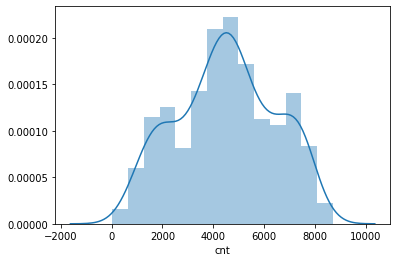

In [26]:
# distribution of count variables
sns.distplot(bike['cnt'])
plt.show()

In [27]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    object 
 3   yr          730 non-null    object 
 4   mnth        730 non-null    object 
 5   holiday     730 non-null    object 
 6   weekday     730 non-null    object 
 7   workingday  730 non-null    object 
 8   weathersit  730 non-null    object 
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(4), object(8)
memory usage: 91.4+ KB


In [28]:
# converting data type as datetime64
bike['dteday'] = bike['dteday'].astype('datetime64')

In [29]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     730 non-null    int64         
 1   dteday      730 non-null    datetime64[ns]
 2   season      730 non-null    object        
 3   yr          730 non-null    object        
 4   mnth        730 non-null    object        
 5   holiday     730 non-null    object        
 6   weekday     730 non-null    object        
 7   workingday  730 non-null    object        
 8   weathersit  730 non-null    object        
 9   temp        730 non-null    float64       
 10  atemp       730 non-null    float64       
 11  hum         730 non-null    float64       
 12  windspeed   730 non-null    float64       
 13  casual      730 non-null    int64         
 14  registered  730 non-null    int64         
 15  cnt         730 non-null    int64         
dtypes: datetime64[ns](1), floa

### Converting to categorical variable

In [30]:
bike_categorical = bike.select_dtypes(exclude=['float64','int64','datetime64'])

In [31]:
bike_categorical.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit'],
      dtype='object')

As you might have noticed, there are a few categorical variables as well. Let's make a boxplot for some of these variables

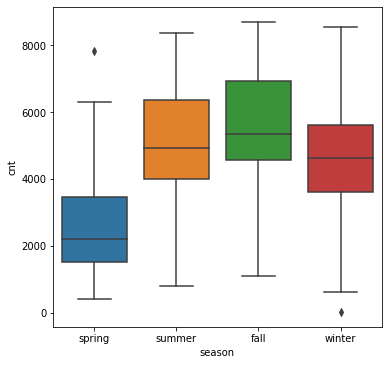

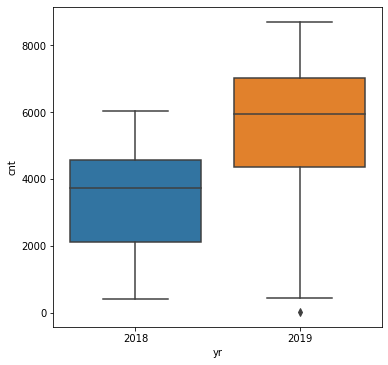

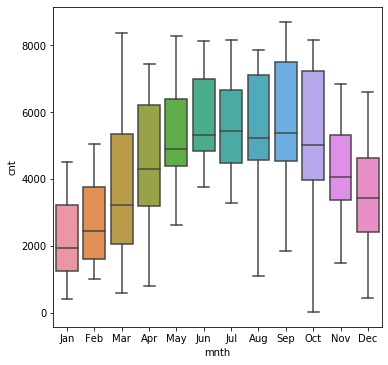

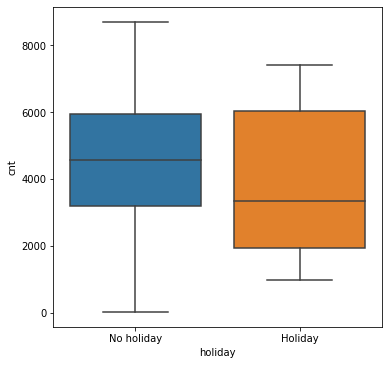

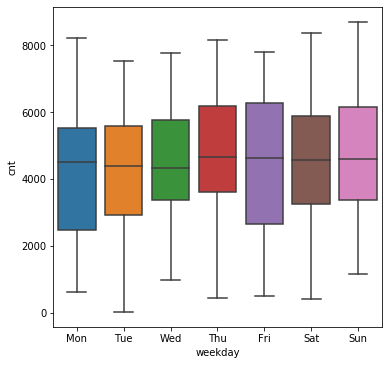

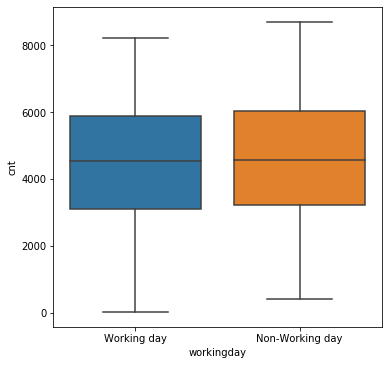

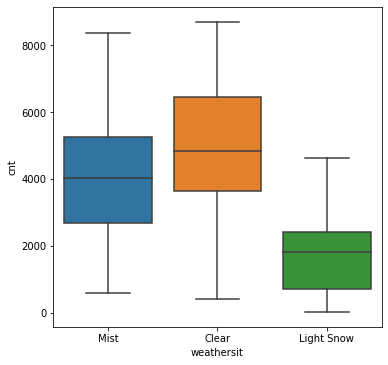

In [32]:
# Data Visualization for Categorical columns

plt.figure(figsize=(20,20))
plt.subplot(3,3,1)
sns.boxplot(x='season',y='cnt',data=bike)

plt.figure(figsize=(20,20))
plt.subplot(3,3,2)
sns.boxplot(x='yr',y='cnt',data=bike)

plt.figure(figsize=(20,20))
plt.subplot(3,3,3)
sns.boxplot(x='mnth',y='cnt',data=bike)

plt.figure(figsize=(20,20))
plt.subplot(3,3,4)
sns.boxplot(x='holiday',y='cnt',data=bike)

plt.figure(figsize=(20,20))
plt.subplot(3,3,5)
sns.boxplot(x='weekday',y='cnt',data=bike)

plt.figure(figsize=(20,20))
plt.subplot(3,3,6)
sns.boxplot(x='workingday',y='cnt',data=bike)

plt.figure(figsize=(20,20))
plt.subplot(3,3,7)
sns.boxplot(x='weathersit',y='cnt',data=bike)

plt.show()

From the box plot, we can easily conclude that:

1. Bike sharing count is more in season of summer and Fall as compared to season of winter and spring.
2. Bike sharing count is more in year 2019 as compared to 2018.
3. Bike sharing count is more in month of June, July, August, September and October than compared to other months.
4. Bike sharing count data is spread out more on holiday as compared to no holiday.   
5. Bike sharing count is low on Monday, Tuesday and Wednesday as compared to other days of week. 
6. Bike sharing count is same in working day and non-Working day.
7. Bike sharing count is more when weathersit is Clear, Few mist and Partly in light snow.

In [33]:
bike.describe().columns

Index(['instant', 'temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered',
       'cnt'],
      dtype='object')

In [34]:

float_var_list = ['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']

for var in float_var_list:
    bike[var] = bike[var].astype(float)

In [35]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     730 non-null    int64         
 1   dteday      730 non-null    datetime64[ns]
 2   season      730 non-null    object        
 3   yr          730 non-null    object        
 4   mnth        730 non-null    object        
 5   holiday     730 non-null    object        
 6   weekday     730 non-null    object        
 7   workingday  730 non-null    object        
 8   weathersit  730 non-null    object        
 9   temp        730 non-null    float64       
 10  atemp       730 non-null    float64       
 11  hum         730 non-null    float64       
 12  windspeed   730 non-null    float64       
 13  casual      730 non-null    float64       
 14  registered  730 non-null    float64       
 15  cnt         730 non-null    float64       
dtypes: datetime64[ns](1), floa

In [36]:
# Select all Numerical features
bike_num = bike.select_dtypes(include=['float64'])
bike_num.head()

,temp,atemp,hum,windspeed,casual,registered,cnt
0,14.110847,18.18125,80.5833,10.749882,331.0,654.0,985.0
1,14.902598,17.68695,69.6087,16.652113,131.0,670.0,801.0
2,8.050924,9.47025,43.7273,16.636703,120.0,1229.0,1349.0
3,8.200000,10.60610,59.0435,10.739832,108.0,1454.0,1562.0
4,9.305237,11.46350,43.6957,12.522300,82.0,1518.0,1600.0


### Multivariate Analysis

Visualising Numeric Variables by making a pairplot of all the numeric variables

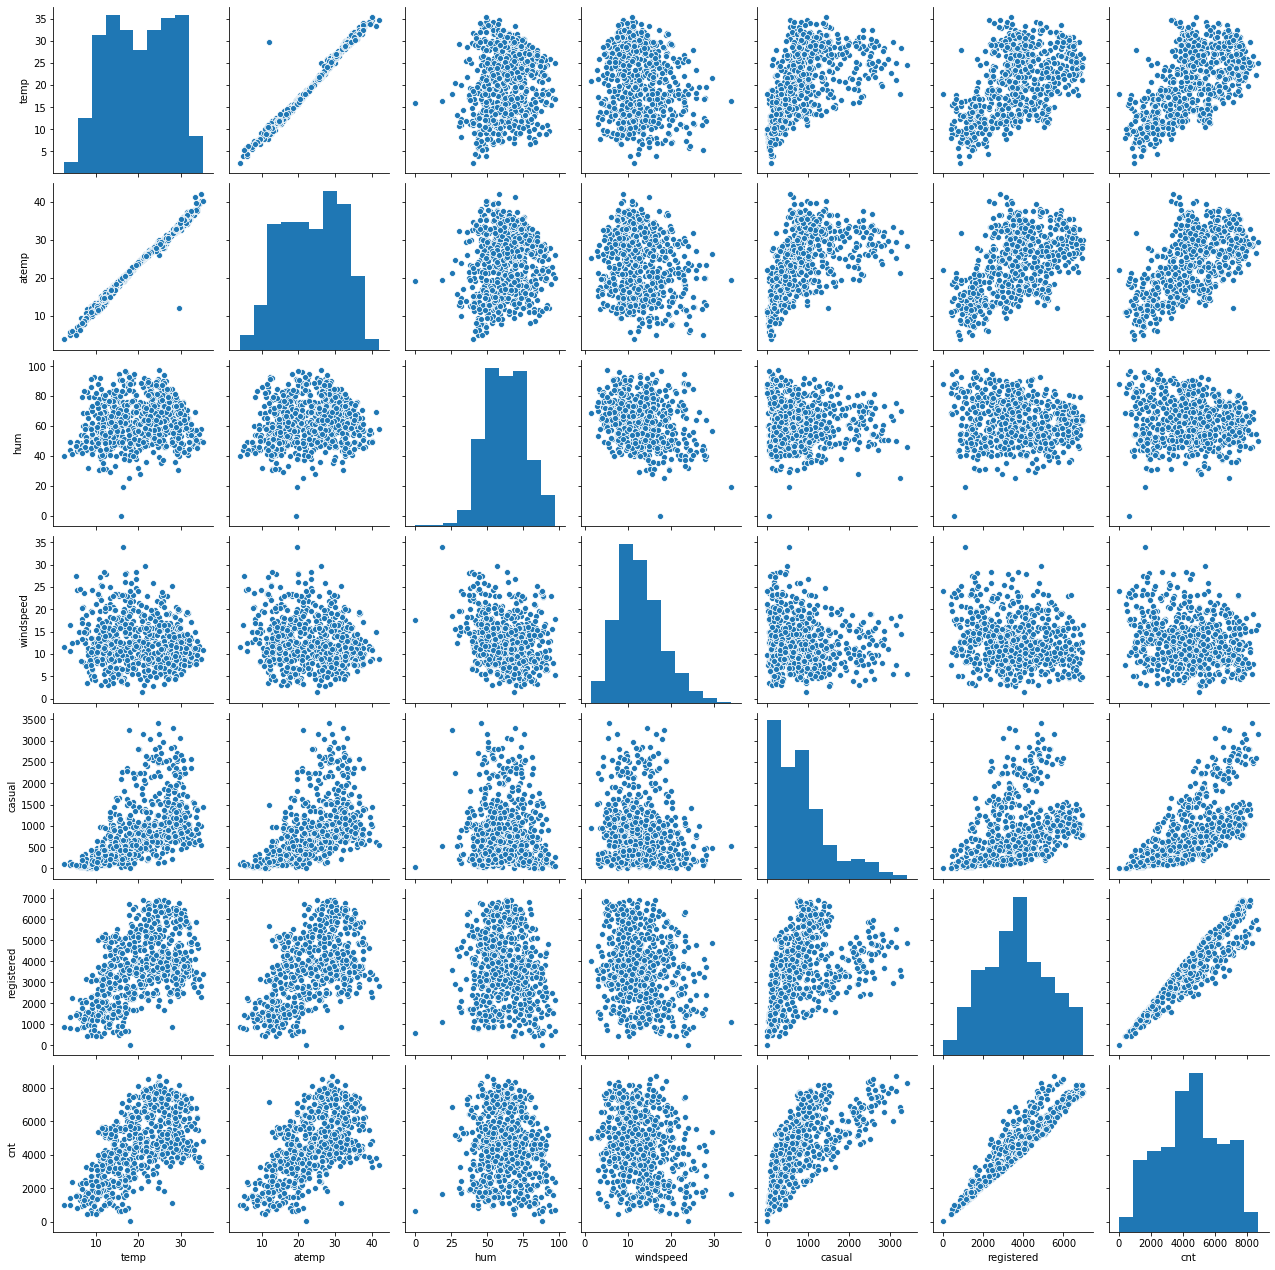

In [37]:
sns.pairplot(bike_num)

From pair plots, we can conclude that:

1. 'registered', 'casual' and 'cnt' are highly correlated, that shows that both 'casual' and 'registered' are similar to 'cnt', hence, we need to drop 'casual' and 'registered'.
2. 'temp' and 'atemp' are highly correlated and hence we can drop one of them from the analysis as they act as redundant variables.


### Corelation Matrix

In [38]:
cor = bike_num.corr()
cor

,temp,atemp,hum,windspeed,casual,registered,cnt
temp,1.000000,0.991696,0.128565,-0.158186,0.542731,0.539436,0.627044
atemp,0.991696,1.000000,0.141512,-0.183876,0.543362,0.543678,0.630685
hum,0.128565,0.141512,1.000000,-0.248506,-0.075211,-0.089212,-0.098543
windspeed,-0.158186,-0.183876,-0.248506,1.000000,-0.167995,-0.217914,-0.235132
casual,0.542731,0.543362,-0.075211,-0.167995,1.000000,0.394137,0.672123
registered,0.539436,0.543678,-0.089212,-0.217914,0.394137,1.000000,0.945411
cnt,0.627044,0.630685,-0.098543,-0.235132,0.672123,0.945411,1.000000


### Heatmap

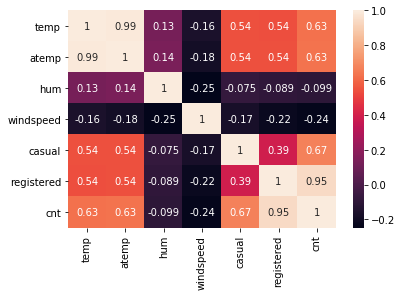

In [39]:
sns.heatmap(cor,annot=True)

In [40]:
# drop atemp
bike.drop('atemp',axis=1,inplace=True)

In [41]:
bike.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'hum', 'windspeed', 'casual',
       'registered', 'cnt'],
      dtype='object')

In [42]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     730 non-null    int64         
 1   dteday      730 non-null    datetime64[ns]
 2   season      730 non-null    object        
 3   yr          730 non-null    object        
 4   mnth        730 non-null    object        
 5   holiday     730 non-null    object        
 6   weekday     730 non-null    object        
 7   workingday  730 non-null    object        
 8   weathersit  730 non-null    object        
 9   temp        730 non-null    float64       
 10  hum         730 non-null    float64       
 11  windspeed   730 non-null    float64       
 12  casual      730 non-null    float64       
 13  registered  730 non-null    float64       
 14  cnt         730 non-null    float64       
dtypes: datetime64[ns](1), float64(6), int64(1), object(7)
memory usage: 85.7+ 

In [43]:
# converting datetype as object
bike_categorical = bike.select_dtypes(include=['object'])

In [44]:
bike_categorical.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit'],
      dtype='object')

## Step 3: Dummy Encoding

Covert all categorical columns to dummy variables, with the use of one hot encoding method.

In [45]:
# converting to dummy variable
bike_dummies=pd.get_dummies(bike_categorical,drop_first=True)
bike_dummies.head()

,season_spring,season_summer,season_winter,yr_2019,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,...,holiday_No holiday,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,workingday_Working day,weathersit_Light Snow,weathersit_Mist
0,1,0,0,0,0,0,0,1,0,0,...,1,1,0,0,0,0,0,1,0,1
1,1,0,0,0,0,0,0,1,0,0,...,1,0,0,0,0,1,0,1,0,1
2,1,0,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,1,1,0,0
3,1,0,0,0,0,0,0,1,0,0,...,1,0,0,0,1,0,0,1,0,0
4,1,0,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,1,0,0


In [46]:
list(bike_categorical.columns)

['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']

In [47]:
bike = bike.drop(bike_categorical.columns,axis=1)
bike.columns

Index(['instant', 'dteday', 'temp', 'hum', 'windspeed', 'casual', 'registered',
       'cnt'],
      dtype='object')

In [48]:
# concatenating bike and bike_dummies
bike = pd.concat([bike,bike_dummies], axis=1)

In [49]:
bike.head()

,instant,dteday,temp,hum,windspeed,casual,registered,cnt,season_spring,season_summer,...,holiday_No holiday,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,workingday_Working day,weathersit_Light Snow,weathersit_Mist
0,1,2018-01-01,14.110847,80.5833,10.749882,331.0,654.0,985.0,1,0,...,1,1,0,0,0,0,0,1,0,1
1,2,2018-02-01,14.902598,69.6087,16.652113,131.0,670.0,801.0,1,0,...,1,0,0,0,0,1,0,1,0,1
2,3,2018-03-01,8.050924,43.7273,16.636703,120.0,1229.0,1349.0,1,0,...,1,0,0,0,0,0,1,1,0,0
3,4,2018-04-01,8.200000,59.0435,10.739832,108.0,1454.0,1562.0,1,0,...,1,0,0,0,1,0,0,1,0,0
4,5,2018-05-01,9.305237,43.6957,12.522300,82.0,1518.0,1600.0,1,0,...,1,0,0,0,0,0,0,1,0,0


### Data unnecessary columns for the analysis

1) Drop 'instant' as it is record index and index is rando number with no relation with cnt.

2) Drop 'atemp' as it is redundant to 'temp', hence dropping atemp.

3) Drop 'casual' and 'registered' as they are more like target variable.

4) Drop 'dteday' as we already have column for month and year and dteday is always 1st of every month.

In [50]:
# drop instant
bike = bike.drop(['instant'],axis=1)
bike.head()

,dteday,temp,hum,windspeed,casual,registered,cnt,season_spring,season_summer,season_winter,...,holiday_No holiday,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,workingday_Working day,weathersit_Light Snow,weathersit_Mist
0,2018-01-01,14.110847,80.5833,10.749882,331.0,654.0,985.0,1,0,0,...,1,1,0,0,0,0,0,1,0,1
1,2018-02-01,14.902598,69.6087,16.652113,131.0,670.0,801.0,1,0,0,...,1,0,0,0,0,1,0,1,0,1
2,2018-03-01,8.050924,43.7273,16.636703,120.0,1229.0,1349.0,1,0,0,...,1,0,0,0,0,0,1,1,0,0
3,2018-04-01,8.200000,59.0435,10.739832,108.0,1454.0,1562.0,1,0,0,...,1,0,0,0,1,0,0,1,0,0
4,2018-05-01,9.305237,43.6957,12.522300,82.0,1518.0,1600.0,1,0,0,...,1,0,0,0,0,0,0,1,0,0


In [51]:
# drop dteday
bike = bike.drop(['dteday'],axis=1)
bike.head()

,temp,hum,windspeed,casual,registered,cnt,season_spring,season_summer,season_winter,yr_2019,...,holiday_No holiday,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,workingday_Working day,weathersit_Light Snow,weathersit_Mist
0,14.110847,80.5833,10.749882,331.0,654.0,985.0,1,0,0,0,...,1,1,0,0,0,0,0,1,0,1
1,14.902598,69.6087,16.652113,131.0,670.0,801.0,1,0,0,0,...,1,0,0,0,0,1,0,1,0,1
2,8.050924,43.7273,16.636703,120.0,1229.0,1349.0,1,0,0,0,...,1,0,0,0,0,0,1,1,0,0
3,8.200000,59.0435,10.739832,108.0,1454.0,1562.0,1,0,0,0,...,1,0,0,0,1,0,0,1,0,0
4,9.305237,43.6957,12.522300,82.0,1518.0,1600.0,1,0,0,0,...,1,0,0,0,0,0,0,1,0,0


In [52]:
len(bike.columns)

31

In [53]:
# drop casual
bike = bike.drop(['casual'],axis=1)
bike.head()

,temp,hum,windspeed,registered,cnt,season_spring,season_summer,season_winter,yr_2019,mnth_Aug,...,holiday_No holiday,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,workingday_Working day,weathersit_Light Snow,weathersit_Mist
0,14.110847,80.5833,10.749882,654.0,985.0,1,0,0,0,0,...,1,1,0,0,0,0,0,1,0,1
1,14.902598,69.6087,16.652113,670.0,801.0,1,0,0,0,0,...,1,0,0,0,0,1,0,1,0,1
2,8.050924,43.7273,16.636703,1229.0,1349.0,1,0,0,0,0,...,1,0,0,0,0,0,1,1,0,0
3,8.200000,59.0435,10.739832,1454.0,1562.0,1,0,0,0,0,...,1,0,0,0,1,0,0,1,0,0
4,9.305237,43.6957,12.522300,1518.0,1600.0,1,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0


In [54]:
# drop registered
bike = bike.drop(['registered'],axis=1)
bike.head()

,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,yr_2019,mnth_Aug,mnth_Dec,...,holiday_No holiday,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,workingday_Working day,weathersit_Light Snow,weathersit_Mist
0,14.110847,80.5833,10.749882,985.0,1,0,0,0,0,0,...,1,1,0,0,0,0,0,1,0,1
1,14.902598,69.6087,16.652113,801.0,1,0,0,0,0,0,...,1,0,0,0,0,1,0,1,0,1
2,8.050924,43.7273,16.636703,1349.0,1,0,0,0,0,0,...,1,0,0,0,0,0,1,1,0,0
3,8.200000,59.0435,10.739832,1562.0,1,0,0,0,0,0,...,1,0,0,0,1,0,0,1,0,0
4,9.305237,43.6957,12.522300,1600.0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0


## Step 4: Dividing into X and Y sets for the model building

In [55]:
X = bike.drop('cnt', axis=1)
y= bike['cnt']

In [56]:
X.shape

(730, 28)

In [57]:
y.shape

(730,)

In [58]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [59]:
X_train.head()

,temp,hum,windspeed,season_spring,season_summer,season_winter,yr_2019,mnth_Aug,mnth_Dec,mnth_Feb,...,holiday_No holiday,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,workingday_Working day,weathersit_Light Snow,weathersit_Mist
239,28.989419,56.1765,20.412153,0,0,0,0,1,0,0,...,1,0,0,0,0,1,0,1,0,0
97,13.769153,83.6250,15.208464,0,1,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,1
503,24.600000,45.6250,5.626325,0,1,0,1,0,0,0,...,1,0,0,1,0,0,0,0,0,0
642,25.215000,62.7500,7.125450,0,0,1,1,0,0,0,...,1,0,1,0,0,0,0,0,0,0
498,23.506653,78.9583,14.250364,0,1,0,1,0,0,0,...,1,0,0,0,0,1,0,1,0,1


In [60]:
X_train.columns

Index(['temp', 'hum', 'windspeed', 'season_spring', 'season_summer',
       'season_winter', 'yr_2019', 'mnth_Aug', 'mnth_Dec', 'mnth_Feb',
       'mnth_Jan', 'mnth_Jul', 'mnth_Jun', 'mnth_Mar', 'mnth_May', 'mnth_Nov',
       'mnth_Oct', 'mnth_Sep', 'holiday_No holiday', 'weekday_Mon',
       'weekday_Sat', 'weekday_Sun', 'weekday_Thu', 'weekday_Tue',
       'weekday_Wed', 'workingday_Working day', 'weathersit_Light Snow',
       'weathersit_Mist'],
      dtype='object')

In [61]:
X_train.describe().columns

Index(['temp', 'hum', 'windspeed', 'season_spring', 'season_summer',
       'season_winter', 'yr_2019', 'mnth_Aug', 'mnth_Dec', 'mnth_Feb',
       'mnth_Jan', 'mnth_Jul', 'mnth_Jun', 'mnth_Mar', 'mnth_May', 'mnth_Nov',
       'mnth_Oct', 'mnth_Sep', 'holiday_No holiday', 'weekday_Mon',
       'weekday_Sat', 'weekday_Sun', 'weekday_Thu', 'weekday_Tue',
       'weekday_Wed', 'workingday_Working day', 'weathersit_Light Snow',
       'weathersit_Mist'],
      dtype='object')

## Step 5: Scaling using MinMaxScaler

In [62]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [63]:
var = ['temp','hum','windspeed']

X_train[var] = scaler.fit_transform(X_train[var])

In [64]:
X_train.head()

,temp,hum,windspeed,season_spring,season_summer,season_winter,yr_2019,mnth_Aug,mnth_Dec,mnth_Feb,...,holiday_No holiday,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,workingday_Working day,weathersit_Light Snow,weathersit_Mist
239,0.807351,0.428211,0.657105,0,0,0,0,1,0,0,...,1,0,0,0,0,1,0,1,0,0
97,0.344785,0.810325,0.462577,0,1,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,1
503,0.673950,0.281322,0.104370,0,1,0,1,0,0,0,...,1,0,0,1,0,0,0,0,0,0
642,0.692641,0.519721,0.160412,0,0,1,1,0,0,0,...,1,0,1,0,0,0,0,0,0,0
498,0.640722,0.745359,0.426760,0,1,0,1,0,0,0,...,1,0,0,0,0,1,0,1,0,1


In [65]:
target_scaler = MinMaxScaler()
target_scaler.fit(np.array(y_train).reshape(-1,1))
y_train_unscaled = y_train

In [66]:
y_train = target_scaler.transform((np.array(y_train).reshape(-1,1)))

## Step 6: Model Building

In [67]:
# Training and Making Predictions
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [68]:
regressor.coef_

array([[ 0.43945877, -0.14731549, -0.14209832, -0.09329864,  0.00621477,
         0.0746833 ,  0.22205781, -0.01680404, -0.05285286, -0.03827272,
        -0.05280701, -0.07054411, -0.01466382,  0.01004406,  0.02430187,
        -0.06307516,  0.00681519,  0.05575196,  0.1113927 , -0.02286626,
        -0.05988313, -0.05044784,  0.00537054, -0.02196478, -0.00963545,
        -0.07278756, -0.20397388, -0.04895795]])

In [69]:
regressor.intercept_

array([0.30194856])

In [70]:
X_test.columns

Index(['temp', 'hum', 'windspeed', 'season_spring', 'season_summer',
       'season_winter', 'yr_2019', 'mnth_Aug', 'mnth_Dec', 'mnth_Feb',
       'mnth_Jan', 'mnth_Jul', 'mnth_Jun', 'mnth_Mar', 'mnth_May', 'mnth_Nov',
       'mnth_Oct', 'mnth_Sep', 'holiday_No holiday', 'weekday_Mon',
       'weekday_Sat', 'weekday_Sun', 'weekday_Thu', 'weekday_Tue',
       'weekday_Wed', 'workingday_Working day', 'weathersit_Light Snow',
       'weathersit_Mist'],
      dtype='object')

In [71]:
X_train.columns

Index(['temp', 'hum', 'windspeed', 'season_spring', 'season_summer',
       'season_winter', 'yr_2019', 'mnth_Aug', 'mnth_Dec', 'mnth_Feb',
       'mnth_Jan', 'mnth_Jul', 'mnth_Jun', 'mnth_Mar', 'mnth_May', 'mnth_Nov',
       'mnth_Oct', 'mnth_Sep', 'holiday_No holiday', 'weekday_Mon',
       'weekday_Sat', 'weekday_Sun', 'weekday_Thu', 'weekday_Tue',
       'weekday_Wed', 'workingday_Working day', 'weathersit_Light Snow',
       'weathersit_Mist'],
      dtype='object')

In [72]:
X_test[var] = scaler.transform(X_test[var])
y_test_unscaled = y_test
y_test = target_scaler.transform((np.array(y_test).reshape(-1,1)))

In [73]:
# Making Predictions
y_pred = regressor.predict(X_test)
y_pred_scaled = y_pred

In [74]:
y_pred = target_scaler.inverse_transform(y_pred)

In [75]:
# Evaluating the Algorithm
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test_unscaled, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test_unscaled, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test_unscaled, y_pred)))

Mean Absolute Error: 592.5103081212911
Mean Squared Error: 573752.4685104523
Root Mean Squared Error: 757.4644998351093


In [76]:
from sklearn.metrics import r2_score
r2_score(y_test_unscaled,y_pred)

0.8704045149316654

In [77]:
y_train_unscaled = target_scaler.inverse_transform(y_train)
y_train_unscaled.shape

(584, 1)

In [78]:
yhat = regressor.predict(X_train)
yhat_unscaled = target_scaler.inverse_transform(yhat)
SS_Residual = sum((y_train_unscaled-yhat_unscaled)**2)
SS_Total = sum((y_train_unscaled-np.mean(y_train_unscaled))**2)
r_squared = 1 - (float(SS_Residual))/SS_Total
adjusted_r_squared = 1 - (1-r_squared)*(len(y_train_unscaled)-1)/(len(y_train_unscaled)-X_train.shape[1]-1)
print(r_squared, adjusted_r_squared)

[0.83731201] [0.82910433]


In [79]:
y_test_unscaled = target_scaler.inverse_transform(y_test)
y_train_unscaled.shape

(584, 1)

In [80]:
yhat = regressor.predict(X_test)
yhat_unscaled = target_scaler.inverse_transform(yhat)
SS_Residual = sum((y_test_unscaled-yhat_unscaled)**2)
SS_Total = sum((y_test_unscaled-np.mean(y_test_unscaled))**2)
r_squared = 1 - (float(SS_Residual))/SS_Total
adjusted_r_squared = 1 - (1-r_squared)*(len(y_test_unscaled)-1)/(len(y_test_unscaled)-X_test.shape[1]-1)
print(r_squared, adjusted_r_squared)

[0.87040451] [0.83939021]


## Step 7: Recursive Feature Elimination (RFE)

In [81]:
import sklearn
print(sklearn.__version__)

# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

0.22.1


In [82]:
# Running RFE with the output number of the variable equal to 16
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(estimator = lm, n_features_to_select=16,verbose=True)   # running RFE
rfe = rfe.fit(X_train, y_train) 

Fitting estimator with 28 features.
Fitting estimator with 27 features.
Fitting estimator with 26 features.
Fitting estimator with 25 features.
Fitting estimator with 24 features.
Fitting estimator with 23 features.
Fitting estimator with 22 features.
Fitting estimator with 21 features.
Fitting estimator with 20 features.
Fitting estimator with 19 features.
Fitting estimator with 18 features.
Fitting estimator with 17 features.


In [83]:
selected_rfe_features = pd.DataFrame({'Feature':list(X_train.columns),
                                     'Support':rfe.support_,
                                     'Ranking':rfe.ranking_})
selected_rfe_features.sort_values(by='Ranking')

,Feature,Support,Ranking
0,temp,True,1
25,workingday_Working day,True,1
18,holiday_No holiday,True,1
17,mnth_Sep,True,1
15,mnth_Nov,True,1
26,weathersit_Light Snow,True,1
11,mnth_Jul,True,1
10,mnth_Jan,True,1
9,mnth_Feb,True,1
27,weathersit_Mist,True,1


In [84]:
col = X_train.columns[rfe.support_]
col

Index(['temp', 'hum', 'windspeed', 'season_spring', 'season_winter', 'yr_2019',
       'mnth_Dec', 'mnth_Feb', 'mnth_Jan', 'mnth_Jul', 'mnth_Nov', 'mnth_Sep',
       'holiday_No holiday', 'workingday_Working day', 'weathersit_Light Snow',
       'weathersit_Mist'],
      dtype='object')

In [85]:
X_train.columns[~rfe.support_]

Index(['season_summer', 'mnth_Aug', 'mnth_Jun', 'mnth_Mar', 'mnth_May',
       'mnth_Oct', 'weekday_Mon', 'weekday_Sat', 'weekday_Sun', 'weekday_Thu',
       'weekday_Tue', 'weekday_Wed'],
      dtype='object')

### Base Model Building model using statsmodel

In [86]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [87]:
X_train_rfe.shape

(584, 16)

In [88]:
# Adding a constant variable 
import statsmodels.api as sm  
from statsmodels.sandbox.regression.predstd import wls_prediction_std
X_train_rfe = sm.add_constant(X_train_rfe)

X_train_rfe.shape

(584, 17)

In [89]:
# Running the linear model
lm = sm.OLS(y_train,X_train_rfe).fit() 

In [90]:
# The summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     176.4
Date:                Mon, 30 Nov 2020   Prob (F-statistic):          6.12e-208
Time:                        20:22:12   Log-Likelihood:                 584.69
No. Observations:                 584   AIC:                            -1135.
Df Residuals:                     567   BIC:                            -1061.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

In [91]:
# Creating X_test dataframe with RFE selected variables
X_test_rfe = X_test[col]
X_test_rfe = sm.add_constant(X_test_rfe)
ypred_test = lm.predict(X_test_rfe)

In [92]:
# Training Predict
ypred_train = lm.predict(X_train_rfe)
print(ypred_test[0:5])
print(ypred_test.shape,y_test.shape)

196    0.479151
187    0.544264
14     0.136434
31     0.109604
390    0.422937
dtype: float64
(146,) (146, 1)


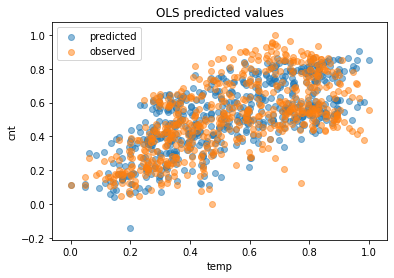

In [93]:
# df1_plot = df1.dropna(subset=['logpgp95', 'avexpr'])
# Plot predicted values
x = X_train['temp']
fix, ax = plt.subplots()
ax.scatter(x, ypred_train, alpha=0.5,
        label='predicted')

# Plot observed values
ax.scatter(x, y_train, alpha=0.5,
        label='observed')

ax.legend()
ax.set_title('OLS predicted values')
ax.set_xlabel('temp')
ax.set_ylabel('cnt')
plt.show()

In [94]:
x_test = X_test['temp']

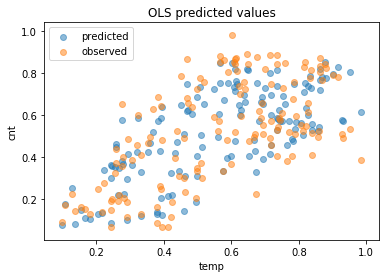

In [95]:
# Plot predicted values
fix, ax = plt.subplots()
ax.scatter(x_test, ypred_test, alpha=0.5,label='predicted')

# Plot observed values
ax.scatter(x_test, y_test, alpha=0.5,label='observed')

ax.legend()
ax.set_title('OLS predicted values')
ax.set_xlabel('temp')
ax.set_ylabel('cnt')
plt.show()

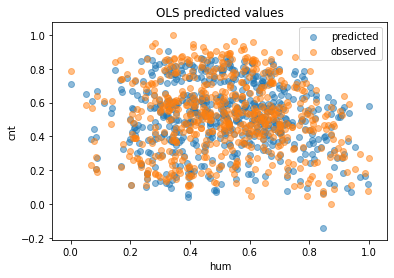

In [96]:
# Plot predicted values
x = X_train['hum']
fix, ax = plt.subplots()
ax.scatter(x, ypred_train, alpha=0.5,
        label='predicted')

# Plot observed values
ax.scatter(x, y_train, alpha=0.5,
        label='observed')

ax.legend()
ax.set_title('OLS predicted values')
ax.set_xlabel('hum')
ax.set_ylabel('cnt')
plt.show()

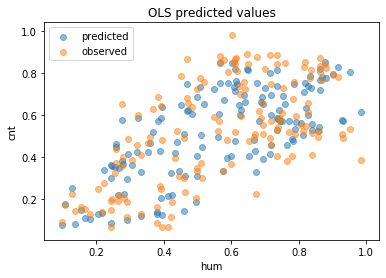

In [97]:
# Plot predicted values
fix, ax = plt.subplots()
ax.scatter(x_test, ypred_test, alpha=0.5,label='predicted')

# Plot observed values
ax.scatter(x_test, y_test, alpha=0.5,label='observed')

ax.legend()
ax.set_title('OLS predicted values')
ax.set_xlabel('hum')
ax.set_ylabel('cnt')
plt.show()

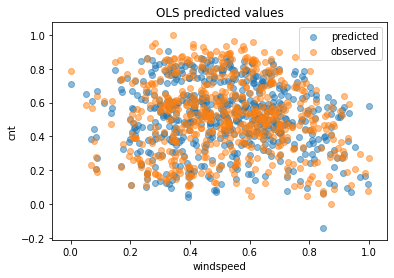

In [98]:
# Plot predicted values
x = X_train['hum']
fix, ax = plt.subplots()
ax.scatter(x, ypred_train, alpha=0.5,
        label='predicted')

# Plot observed values
ax.scatter(x, y_train, alpha=0.5,
        label='observed')

ax.legend()
ax.set_title('OLS predicted values')
ax.set_xlabel('windspeed')
ax.set_ylabel('cnt')
plt.show()

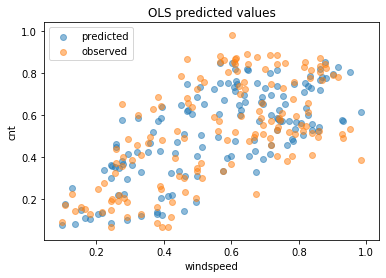

In [99]:
# Plot predicted values
fix, ax = plt.subplots()
ax.scatter(x_test, ypred_test, alpha=0.5,label='predicted')

# Plot observed values
ax.scatter(x_test, y_test, alpha=0.5,label='observed')

ax.legend()
ax.set_title('OLS predicted values')
ax.set_xlabel('windspeed')
ax.set_ylabel('cnt')
plt.show()

Text(0, 0.5, 'ypred')

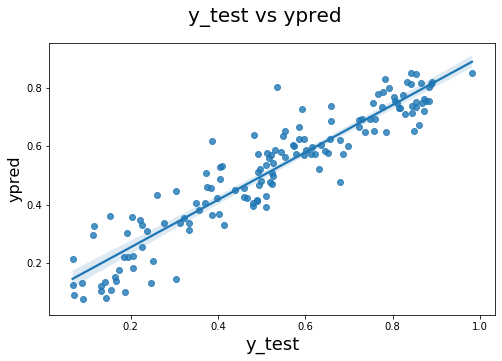

In [100]:
fig = plt.figure(figsize=(8,5))
sns.regplot(y_test,ypred_test)
fig.suptitle('y_test vs ypred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('ypred', fontsize=16)     

Here, we can see that y_pred and y_test are in a linar relationship.

### Accuracy of the Model

In [101]:
from sklearn import metrics

In [102]:
print(metrics.mean_absolute_error(y_test_unscaled,ypred_test))
print(metrics.mean_squared_error(y_test_unscaled,ypred_test))
print(metrics.mean_squared_log_error(y_test_unscaled,ypred_test))

4569.442294917379
25306232.97852842
62.14883958947217


In [107]:
def rmse(x,y):
    return np.sqrt(np.mean((x-y)**2))

In [116]:
print("Train_data", rmse(np.array(y_train_unscaled).reshape(-1), np.array(target_scaler.inverse_transform(np.array(ypred_train).reshape(-1,1))).reshape(-1)))
print("Test_data", rmse(np.array(y_test).reshape(-1), np.array(target_scaler.inverse_transform(np.array(ypred_test).reshape(-1,1))).reshape(-1)))

Train_data 772.8204208431976
Test_data 4867.426534170305


## Step 8: Regression Model Assumptions Validation

### 1) Calculating VIF

In [117]:
#Import library for VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [118]:
# VIF function
def checkVIF(X):
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return(vif)

In [119]:
X_train_rfe.head()

,const,temp,hum,windspeed,season_spring,season_winter,yr_2019,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Nov,mnth_Sep,holiday_No holiday,workingday_Working day,weathersit_Light Snow,weathersit_Mist
239,1.0,0.807351,0.428211,0.657105,0,0,0,0,0,0,0,0,0,1,1,0,0
97,1.0,0.344785,0.810325,0.462577,0,0,0,0,0,0,0,0,0,1,0,0,1
503,1.0,0.673950,0.281322,0.104370,0,0,1,0,0,0,0,0,0,1,0,0,0
642,1.0,0.692641,0.519721,0.160412,0,1,1,0,0,0,0,0,0,1,0,0,0
498,1.0,0.640722,0.745359,0.426760,0,0,1,0,0,0,0,0,0,1,1,0,1


In [120]:
checkVIF(X_test_rfe)

,Features,VIF
0,const,91.92
4,season_spring,4.36
1,temp,4.31
9,mnth_Jan,2.90
8,mnth_Feb,2.69
5,season_winter,2.13
2,hum,1.83
7,mnth_Dec,1.81
11,mnth_Nov,1.70
16,weathersit_Mist,1.63


VIF determines the strength of the correlation between the independent variables. It is predicted by taking a variable and regressing it against every other variable. VIF is below 5 in all the features. Thus it satisfy the condition.

### 2) Normality of the Error Terms

In [121]:
lm = sm.OLS(y_train,X_train_rfe).fit()
y_train_cmt = lm.predict(X_train_rfe)

In [122]:
y_train_cmt

239    0.526595
97     0.292572
503    0.823881
642    0.862903
498    0.622866
         ...   
707    0.529160
192    0.541216
629    0.792887
559    0.690685
684    0.646822
Length: 584, dtype: float64

In [123]:
qqq = np.array([1,2,3])
print(qqq.shape)
qqq.reshape(-1,1).shape
# qqq.shape
# type(y_train)

(3,)


(3, 1)

Text(0.5, 0, 'Errors')

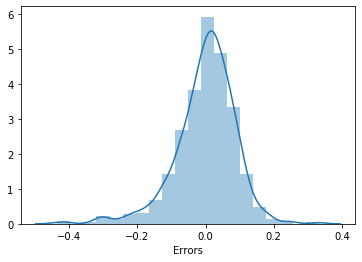

In [124]:
fig = plt.figure()
sns.distplot((y_train-np.array(y_train_cmt).reshape(-1,1)),bins=20)
plt.xlabel("Errors")

The random errors follow a normal distribution. From the plot given below, we can conclude that all error terms are normally distributed. Hence, it satisfies the assumption. 

### 3) Homoscedasticity


 Breusch-Pagan test ----
                                   value
Lagrange multiplier statistic  51.041426
p-value                         0.000016
f-value                         3.393848
f p-value                       0.000009

 Goldfeld-Quandt test ----
                value
F statistic  1.081021
p-value      0.259369

 Residuals plots ----


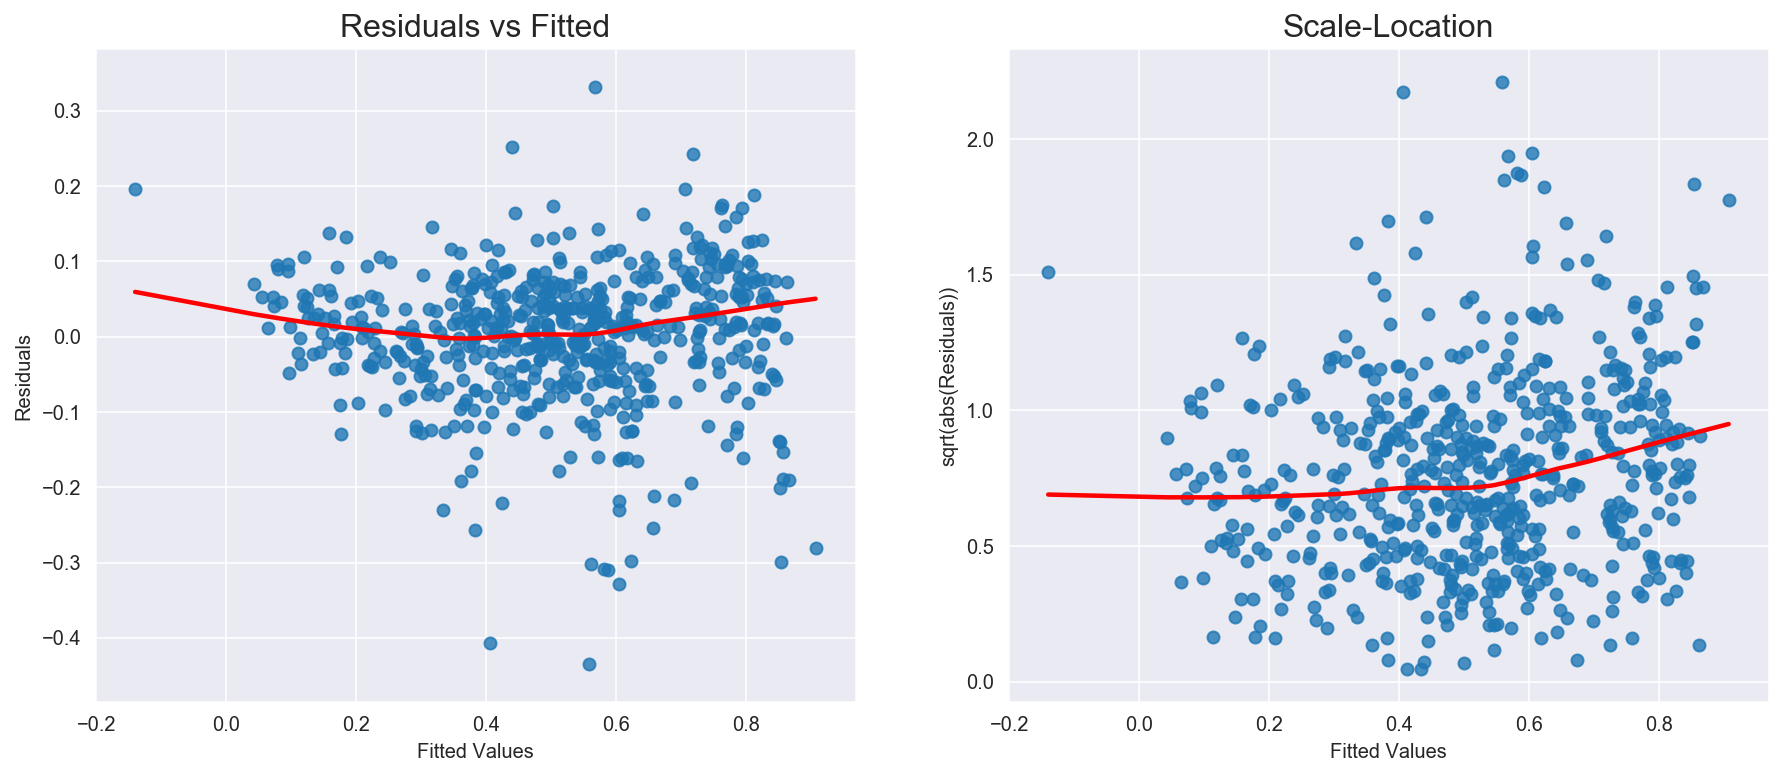

In [125]:
%matplotlib inline
%config InlineBackend.figure_format ='retina'
import seaborn as sns 
import matplotlib.pyplot as plt
import statsmodels.stats.api as sms
sns.set_style('darkgrid')
sns.mpl.rcParams['figure.figsize'] = (15.0, 6.0)

def homoscedasticity_test(model):
    '''
    Function for testing the homoscedasticity of residuals in a linear regression model.
    It plots residuals and standardized residuals vs. fitted values and runs Breusch-Pagan and Goldfeld-Quandt tests.
    
    Args:
    * model - fitted OLS model from statsmodels
    '''
    fitted_vals = model.predict()
    resids = model.resid
    resids_standardized = model.get_influence().resid_studentized_internal

    fig, ax = plt.subplots(1,2)

    sns.regplot(x=fitted_vals, y=resids, lowess=True, ax=ax[0], line_kws={'color': 'red'})
    ax[0].set_title('Residuals vs Fitted', fontsize=16)
    ax[0].set(xlabel='Fitted Values', ylabel='Residuals')

    sns.regplot(x=fitted_vals, y=np.sqrt(np.abs(resids_standardized)), lowess=True, ax=ax[1], line_kws={'color': 'red'})
    ax[1].set_title('Scale-Location', fontsize=16)
    ax[1].set(xlabel='Fitted Values', ylabel='sqrt(abs(Residuals))')

    bp_test = pd.DataFrame(sms.het_breuschpagan(resids, model.model.exog), 
                           columns=['value'],
                           index=['Lagrange multiplier statistic', 'p-value', 'f-value', 'f p-value'])

    gq_test = pd.DataFrame(sms.het_goldfeldquandt(resids, model.model.exog)[:-1],
                           columns=['value'],
                           index=['F statistic', 'p-value'])

    print('\n Breusch-Pagan test ----')
    print(bp_test)
    print('\n Goldfeld-Quandt test ----')
    print(gq_test)
    print('\n Residuals plots ----')

homoscedasticity_test(lm)

This assumes homoscedasticity, which is the same variance within our error terms. Heteroscedasticity, the violation of homoscedasticity, occurs when we don’t have an even variance across the error terms.

In the below graph we can see that error terms are not forming any pattern. If heteroscedasticity was there, the error terms in below graph would make a funnel or v shape. Thus, it satisfies the assumption.


### 4) Linear Relationship between the features and target:

According to this assumption there is linear relationship between the features and target. Linear regression captures only linear relationship. This can be validated by plotting a scatter plot between the features and the target. So below plot show that  there is a linear relationship between ‘cnt’ and independent variables 

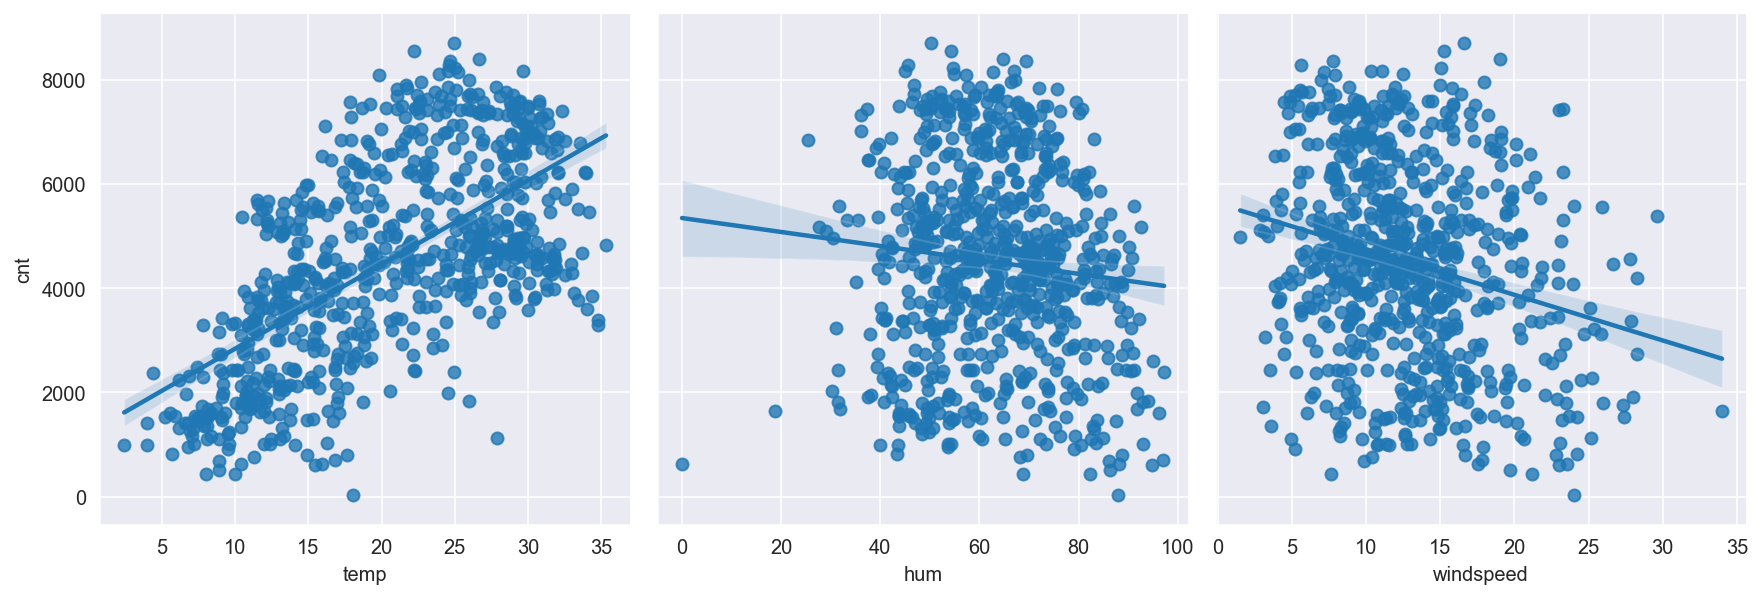

In [126]:
sns.pairplot(bike, x_vars=['temp', 'hum', 'windspeed'], y_vars='cnt',size=4, aspect=1, kind='reg',)
plt.show()